In [3]:
import pandas as pd

In [4]:
elec = pd.read_csv('conso-elec.csv', encoding='utf_8', sep=';')
pd.set_option('max_columns', None)

In [5]:
conso_secteur = elec.filter(like='Consommation', axis=1).astype(int)

In [6]:
secteurs = [nom_colonne for nom_colonne in conso_secteur.columns]
totaux = []
for colonne in conso_secteur:
    total_secteur = conso_secteur[colonne].sum()
    totaux.append(total_secteur)

In [18]:
import matplotlib.pyplot as plt
import pandas_bokeh
pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [8]:
par_secteur = dict(zip())

In [9]:
par_an = elec.groupby('Année').sum()

In [10]:
par_an.reset_index(inplace=True)

In [12]:
annees = [ligne for ligne in par_an['Année']]
totaux_annee = [total for total in par_an['consototale'].astype(int) / 10**6]

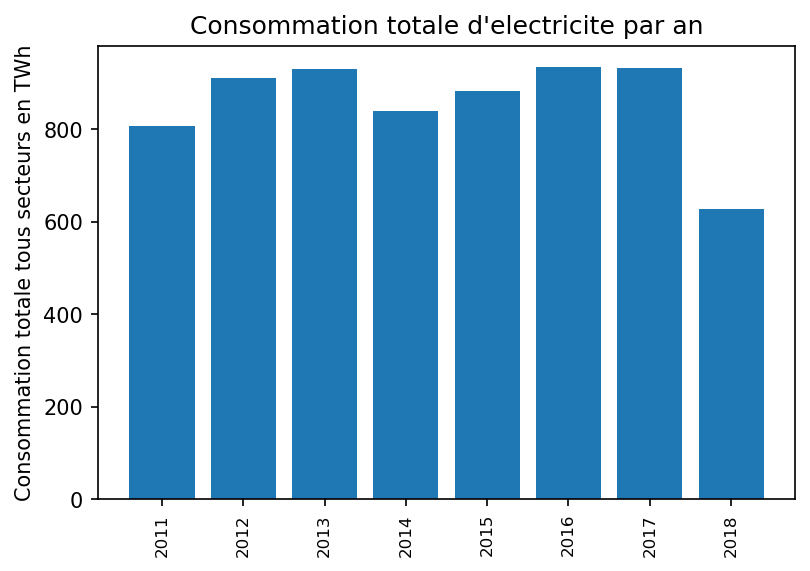

In [13]:
plt.figure(dpi=150)
plt.bar(annees, totaux_annee)
plt.xticks(annees, rotation='90', fontsize=8)
plt.ylabel('Consommation totale tous secteurs en TWh')
plt.title('Consommation totale d\'electricite par an')
plt.show()

In [14]:
par_an_et_secteur = par_an.filter(like='Consommation', axis=1)

In [15]:
par_an_et_secteur['Annee'] = list(map(str, annees))

In [19]:
par_an_et_secteur.plot(kind='area', x=par_an_et_secteur['Annee'], stacked=True, figsize=(1000,600),legend='top_left')

Figure(id='1716', ...)